In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

### 1. Целевой признак (target)

In [3]:
# датафрейм рекламных бюджетов из певого источника
adspends1 = pd.read_excel('data/Data_Sample.xlsx', header=1, usecols="A:D", names = ['Company','Jan', 'Feb', 'Mar'], 
                          index_col = 0)

In [4]:
adspends1.head()

,Jan,Feb,Mar
Company,,,
Company 1,1004.68,3005.99,2611.09
Company 2,11616.06,11751.78,11856.49
Company 3,15688.33,11118.53,14704.23
Company 4,12584.22,11435.94,13410.76
Company 5,2794.08,1452.32,2468.17


In [5]:
adspends1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, Company 1 to Company 1042
Data columns (total 3 columns):
Jan    1042 non-null float64
Feb    1042 non-null float64
Mar    1042 non-null float64
dtypes: float64(3)
memory usage: 32.6+ KB


In [6]:
adspends1.duplicated().sum()

37

In [7]:
adspends1[adspends1.duplicated()]

,Jan,Feb,Mar
Company,,,
Company 71,0.00,0.00,0.00
Company 133,0.00,0.00,0.00
Company 165,0.00,0.00,0.00
Company 169,0.00,0.00,0.00
Company 244,0.00,0.00,0.00
Company 270,0.00,0.00,0.00
Company 291,0.00,0.00,0.00
Company 322,0.00,0.00,0.00
Company 380,0.00,0.00,0.00


В Источнике 1 *ненулевых* дубликатов нет. 

In [8]:
# датафрейм рекламных бюджетов из второго источника
adspends2 = pd.read_excel('data/Data_Sample.xlsx', header=1, usecols = "A,E:O", index_col = 0)
adspends2.columns = adspends2.columns.str[:3]

In [9]:
#сдвинем данные на один месяц назад (по условию исх. данные сдвинуты на мес. вперед )
adspends2.insert(0, 'Apr', 1.)
adspends2 = adspends2.shift(-1, axis = 1).drop('Mar', axis=1)
adspends2.head()

,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
Company,,,,,,,,,,,
Company 1,142881.60,71213.10,172.20,195.90,208.20,1400.10,1400.10,24350.40,22062.30,36086.40,49630.50
Company 2,25612.80,28229.10,28436.70,28431.90,32159.70,37392.90,52060.80,84560.10,245107.20,274250.70,286311.60
Company 3,13526.40,151.80,247.20,255.30,293.40,2538.60,15365.70,19222.80,24470.10,30510.00,32893.80
Company 4,2316.90,5782.50,5480.70,5680.50,5737.50,6132.90,5955.60,6527.70,21309.00,26328.60,29361.00
Company 5,107897.10,91683.30,1563.60,2745.60,4247.40,7179.00,9541.50,21456.90,32172.60,36182.70,37941.60


In [10]:
adspends2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, Company 1 to Company 1042
Data columns (total 11 columns):
Apr    1042 non-null float64
May    1042 non-null float64
Jun    1042 non-null float64
Jul    1042 non-null float64
Aug    1042 non-null float64
Sep    1042 non-null float64
Oct    1042 non-null float64
Nov    1042 non-null float64
Dec    1042 non-null float64
Jan    1042 non-null float64
Feb    1042 non-null float64
dtypes: float64(11)
memory usage: 97.7+ KB


In [11]:
adspends2.duplicated().sum()

25

In [12]:
adspends2[adspends2.duplicated()]

,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
Company,,,,,,,,,,,
Company 77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 115,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 198,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 270,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 382,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 450,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 549,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Company 586,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


В источнике 2 присутствуют ненулевые дубликаты. Данные не очень аккуратные

Сравним данные из двух источников:

In [13]:
adspends1.describe(percentiles=[.1, .5, .9])

,Jan,Feb,Mar
count,1042.00,1042.00,1042.00
mean,415724.66,367794.39,333392.04
std,3000874.05,2358081.89,1740364.63
min,0.00,0.00,0.00
10%,1457.42,1351.26,1074.72
50%,34356.12,33802.57,33448.00
90%,648705.61,593240.13,566725.86
max,87507351.24,64186023.74,34481287.19


In [14]:
adspends2.describe(percentiles=[.1, .5, .9])

,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb
count,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00,1042.00
mean,220168.26,212314.50,212082.97,212165.64,212270.44,211438.53,208942.99,243046.05,251368.43,258762.14,261491.41
std,1100693.49,1045792.15,1032761.83,1015722.09,1007784.16,989475.16,968178.57,1091021.34,1100710.31,1116914.43,1117016.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
10%,10058.64,9137.73,8983.23,8809.17,8896.23,9343.92,9394.23,13353.81,14225.04,15612.33,16029.57
50%,59945.55,58060.35,57699.90,58143.15,59174.70,58584.45,57435.60,71736.45,74584.65,77549.25,79954.65
90%,372186.93,355988.52,368997.66,368270.97,374554.32,380890.47,375601.41,421448.37,441365.37,460359.00,472570.05
max,31873949.70,30226028.10,29853451.50,29336772.60,29086394.10,28513300.80,27833731.20,31338640.20,31436558.70,31794198.60,31689488.70


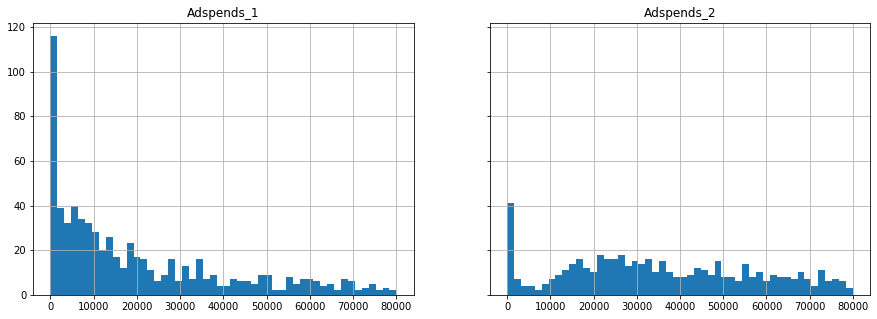

In [15]:
# диаграммы для февральских бюджетов в диапазоне $0..5000
fig,ax = plt.subplots(1, 2, figsize=(15, 5), sharey = True)
ax[0].set_title('Adspends_1')
ax[1].set_title('Adspends_2')
adspends1['Feb'].hist(bins=50, range = (0, 80000), ax = ax[0])
adspends2['Feb'].hist(bins=50, range = (0, 80000), ax = ax[1])

In [16]:
print('Процент компаний с бюджетом в ферале до 5000:')
print('1 источник - {:.1%}'.format(adspends1.query('Feb < 5000')['Feb'].count() / len(adspends1)))
print('2 источник - {:.1%}'.format(adspends2.query('Feb < 5000')['Feb'].count() / len(adspends2)))

Процент компаний с бюджетом в ферале до 5000:
1 источник - 18.8%
2 источник - 5.0%


На диграммах наглядно видно различие. В источнике 1 гораздо больше доля компаний с низким бюджетом. Например, для февральских бюджетов доля компаний с бюжетом меньшим 5000 в 1 источнике - почти 19\%, тогда как в истонике 2 - 5\%.  
Медианное значение февральского бюджета для источника 1  - 33802, для источника 2 - в 2,3 раза больше 79954.

Можно предположить, что в источник 1 учитывает условия текущего кризиса, в то время, как источнике 2 - данные без учета кризисных условий.  
Другой недостаток источника 2 - присутствие дубликатов строк.

Для формирования целевого признака будем использовать данные источника1 (adspends1).  
*Т.к. наша задача определить компании с большим бюджетом, и бюджет которых растет от месяца к месяцу (особенно в кризис), разделим все компании на два класса: 1 - компании, удовлетворяющие этому условию, 0 - все остальные. И в дальшейшем задача поиска интересных нам компаний сведется в бинарной классификации.* 

В качестве порогового значения размера бюджета возьмем медианное значение за последний месяц данных (Март), т.е. будем рассматривать компании с бюджетом в Марте > 30000. 

In [17]:
Spend_tresh = 30000

In [18]:
# fl (flag) - целевой признак. 1 - если бюджет растет от января к марту, и в марте размер бюджета больше 30000
adspends1['fl'] = ((adspends1['Jan'] < adspends1['Feb']) & 
                 (adspends1['Feb'] < adspends1['Mar']) & (adspends1['Mar'] >= Spend_tresh)).astype(int)

In [19]:
adspends1.head()

,Jan,Feb,Mar,fl
Company,,,,
Company 1,1004.68,3005.99,2611.09,0
Company 2,11616.06,11751.78,11856.49,0
Company 3,15688.33,11118.53,14704.23,0
Company 4,12584.22,11435.94,13410.76,0
Company 5,2794.08,1452.32,2468.17,0


In [20]:
len(adspends1['fl'])

1042

In [21]:
# кол-во объектов каждого класса
adspends1['fl'].value_counts()

0    939
1    103
Name: fl, dtype: int64

Классы несбалансированы.

### 2. Признаки (features)

In [22]:
# датафрейм признаков компаний
details = pd.read_excel('data/Data_Sample.xlsx', sheet_name=2, usecols="A:N")
details.head()

,Company,industry,naics_description,sic_description,categories,naics_code,naics_codes,sic_code,sic_codes,employees_range,employees,revenue_range,revenue,year_founded
0,Company 1,Computer Software,Computer Systems Design and Related Services,"Computer Programming, Data Processing, And Oth...","insurance:2.16, education:0.54, software:0.27,...",54151.00,"524210, 54151",737.00,"6411, 737",10 - 50,nan,NaN,nan,2012.00
1,Company 2,Consumer Services,Security Systems Services (except Locksmiths),Security systems services,"alarm system:7.32, art:0.49, environmental:0.7...",561621.00,561621,7382.00,7382,"500 - 1,000",nan,100M - 200M,nan,2007.00
2,Company 3,Wholesale,"Hardware, and Plumbing and Heating Equipment a...",Wholesale Trade - Durable Goods,"hvac:13.89, plumbing product:2.78, power tool:...",4237.00,"221310, 221330, 237310, 238210, 238220, 325620...",50.00,"1711, 1721, 2844, 3053, 3088, 3089, 3429, 3432...","> 10,000",27188.00,> 1B,nan,1953.00
3,Company 4,Restaurants,Limited-Service Restaurants,Eating places,"meal:15.24, snack:19.05, wellness:0.71, health...",722513.00,"4451, 445299, 722, 7223, 722513",5812.00,"541, 5812","500 - 1,000",nan,100M - 200M,nan,2010.00
4,Company 5,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:20.0, education:1.54, universities:3.0...",611310.00,"54, 61, 611, 611110, 611310",8221.00,"7389, 8211, 8221","1,000 - 5,000",2305.00,200M - 1B,251081595.00,1919.00


In [23]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 14 columns):
Company              1073 non-null object
industry             977 non-null object
naics_description    1067 non-null object
sic_description      1024 non-null object
categories           1068 non-null object
naics_code           1067 non-null float64
naics_codes          1067 non-null object
sic_code             1024 non-null float64
sic_codes            1024 non-null object
employees_range      965 non-null object
employees            622 non-null float64
revenue_range        939 non-null object
revenue              308 non-null float64
year_founded         977 non-null float64
dtypes: float64(5), object(9)
memory usage: 117.5+ KB


In [24]:
# проверим на дубликаты
print(details.duplicated().sum())
details[details.duplicated()]

31


,Company,industry,naics_description,sic_description,categories,naics_code,naics_codes,sic_code,sic_codes,employees_range,employees,revenue_range,revenue,year_founded
89,Company 89,Restaurants,Full-Service Restaurants,Eating places,"door:0.91, food delivery:25.45, electronics:1....",722511.00,"488510, 492210, 5415, 722, 722511",5812.00,"4215, 4731, 5812, 73","500 - 1,000",675.00,100M - 200M,nan,2013.00
91,Company 90,Accounting,"Accounting, Tax Preparation, Bookkeeping, and ...","Accounting, auditing, and bookkeeping","transaction service:6.43, accountant:14.29, be...",5412.00,"52, 523930, 54, 541199, 5412, 541211, 541213, ...",8721.00,"6282, 7291, 73, 7371, 7376, 7379, 7389, 80, 80...","> 10,000",184000.00,> 1B,32100000000.00,1998.00
96,Company 94,Restaurants,Limited-Service Restaurants,Eating places,"digital marketing:6.67, food delivery:11.67, d...",722513.00,"722, 722511, 722513",5812.00,5812,10 - 50,nan,NaN,nan,2014.00
124,Company 121,Management Consulting,Marketing Consulting Services,Management consulting services,"management consulting:2.86, contextual targeti...",541613.00,"541613, 5418",8742.00,"7372, 8742",200 - 500,nan,10M - 50M,nan,2010.00
179,Company 175,NaN,Travel Arrangement and Reservation Services,NaN,"adventure travel:6.67, fleet:1.04, charter:4.1...",5615.00,5615,nan,NaN,"500 - 1,000",528.00,200M - 1B,302350000.00,2010.00
227,Company 222,Internet,Other Information Services,Drinking places,"gift:0.75, booking:8.75, beauty:0.75, entertai...",5191.00,"5191, 541519, 541990, 722410",5813.00,"5813, 7379","5,000 - 10,000",5840.00,200M - 1B,917280000.00,2004.00
312,Company 305,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:2.5, education:1.67, software:0.42, un...",611310.00,"61, 611, 611310",8221.00,8221,"> 10,000",10624.00,> 1B,2363062000.00,1868.00
314,Company 305,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:2.5, education:1.67, software:0.42, un...",611310.00,"61, 611, 611310",8221.00,8221,"> 10,000",10624.00,> 1B,2363062000.00,1868.00
315,Company 305,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:2.5, education:1.67, software:0.42, un...",611310.00,"61, 611, 611310",8221.00,8221,"> 10,000",10624.00,> 1B,2363062000.00,1868.00
359,Company 350,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:2.5, education:2.5, speech therapy:0.9...",611310.00,"61, 611, 611310, 62, 621210, 621340, 621420",8221.00,"80, 8021, 8049, 8093, 8221","1,000 - 5,000",2004.00,200M - 1B,268838748.00,1895.00


In [25]:
# удаляем дубликаты
details.drop_duplicates(inplace=True)

In [26]:
details.set_index('Company', inplace = True)
details.head()

,industry,naics_description,sic_description,categories,naics_code,naics_codes,sic_code,sic_codes,employees_range,employees,revenue_range,revenue,year_founded
Company,,,,,,,,,,,,,
Company 1,Computer Software,Computer Systems Design and Related Services,"Computer Programming, Data Processing, And Oth...","insurance:2.16, education:0.54, software:0.27,...",54151.00,"524210, 54151",737.00,"6411, 737",10 - 50,nan,NaN,nan,2012.00
Company 2,Consumer Services,Security Systems Services (except Locksmiths),Security systems services,"alarm system:7.32, art:0.49, environmental:0.7...",561621.00,561621,7382.00,7382,"500 - 1,000",nan,100M - 200M,nan,2007.00
Company 3,Wholesale,"Hardware, and Plumbing and Heating Equipment a...",Wholesale Trade - Durable Goods,"hvac:13.89, plumbing product:2.78, power tool:...",4237.00,"221310, 221330, 237310, 238210, 238220, 325620...",50.00,"1711, 1721, 2844, 3053, 3088, 3089, 3429, 3432...","> 10,000",27188.00,> 1B,nan,1953.00
Company 4,Restaurants,Limited-Service Restaurants,Eating places,"meal:15.24, snack:19.05, wellness:0.71, health...",722513.00,"4451, 445299, 722, 7223, 722513",5812.00,"541, 5812","500 - 1,000",nan,100M - 200M,nan,2010.00
Company 5,Higher Education,"Colleges, Universities, and Professional Schools",Colleges and universities,"college:20.0, education:1.54, universities:3.0...",611310.00,"54, 61, 611, 611110, 611310",8221.00,"7389, 8211, 8221","1,000 - 5,000",2305.00,200M - 1B,251081595.00,1919.00


In [27]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, Company 1 to Company 1042
Data columns (total 13 columns):
industry             947 non-null object
naics_description    1036 non-null object
sic_description      994 non-null object
categories           1037 non-null object
naics_code           1036 non-null float64
naics_codes          1036 non-null object
sic_code             994 non-null float64
sic_codes            994 non-null object
employees_range      937 non-null object
employees            596 non-null float64
revenue_range        909 non-null object
revenue              284 non-null float64
year_founded         947 non-null float64
dtypes: float64(5), object(8)
memory usage: 114.0+ KB


Удалим из признаков naics_description, naics_codes, sic_description, sic_codes, как признаки, коррелирующие с naics_code и sic_code.  
В employees и revenue очень много пропусков. Данные призанки не дадут много информации для модели. Удаляем.  

In [28]:
del_list = ['naics_description', 'naics_codes', 'sic_description', 'sic_codes', 'employees', 'revenue']
details.drop(del_list, axis=1, inplace=True)

In [29]:
details.head()

,industry,categories,naics_code,sic_code,employees_range,revenue_range,year_founded
Company,,,,,,,
Company 1,Computer Software,"insurance:2.16, education:0.54, software:0.27,...",54151.00,737.00,10 - 50,NaN,2012.00
Company 2,Consumer Services,"alarm system:7.32, art:0.49, environmental:0.7...",561621.00,7382.00,"500 - 1,000",100M - 200M,2007.00
Company 3,Wholesale,"hvac:13.89, plumbing product:2.78, power tool:...",4237.00,50.00,"> 10,000",> 1B,1953.00
Company 4,Restaurants,"meal:15.24, snack:19.05, wellness:0.71, health...",722513.00,5812.00,"500 - 1,000",100M - 200M,2010.00
Company 5,Higher Education,"college:20.0, education:1.54, universities:3.0...",611310.00,8221.00,"1,000 - 5,000",200M - 1B,1919.00


In [30]:
details['revenue_range'].unique()

array([nan, '100M - 200M', '> 1B', '200M - 1B', '10M - 50M', '50M - 100M',
       '1M - 10M', '0 - 1M'], dtype=object)

In [31]:
details['employees_range'].unique()

array(['10 - 50', '500 - 1,000', '> 10,000', '1,000 - 5,000', '200 - 500',
       '50 - 200', '5,000 - 10,000', nan, '1 - 10'], dtype=object)

В revenue_range и employees_range закодируем соответствующие диапазоны номерами по возрастанию значений.

In [32]:
revenue_dict = {'0 - 1M': 0,
                '1M - 10M': 1,
                '10M - 50M': 2,
                '50M - 100M': 3,
                '100M - 200M': 4,
                '200M - 1B': 5,
                '> 1B': 6}

employ_dict = {'1 - 10': 0,
                '10 - 50': 1,
                '50 - 200': 2,
                '200 - 500': 3,
                '500 - 1,000': 4,
                '1,000 - 5,000': 5,
                '5,000 - 10,000': 6,
                '> 10,000': 7}

In [33]:
details['revenue_range'] = details['revenue_range'].map(revenue_dict)
details['employees_range'] = details['employees_range'].map(employ_dict)

In [34]:
details.head()

,industry,categories,naics_code,sic_code,employees_range,revenue_range,year_founded
Company,,,,,,,
Company 1,Computer Software,"insurance:2.16, education:0.54, software:0.27,...",54151.00,737.00,1.00,nan,2012.00
Company 2,Consumer Services,"alarm system:7.32, art:0.49, environmental:0.7...",561621.00,7382.00,4.00,4.00,2007.00
Company 3,Wholesale,"hvac:13.89, plumbing product:2.78, power tool:...",4237.00,50.00,7.00,6.00,1953.00
Company 4,Restaurants,"meal:15.24, snack:19.05, wellness:0.71, health...",722513.00,5812.00,4.00,4.00,2010.00
Company 5,Higher Education,"college:20.0, education:1.54, universities:3.0...",611310.00,8221.00,5.00,5.00,1919.00


Из categories достанем информацию о категории компании с самым большим весом. 

In [35]:
details[details['categories'].isna()]

,industry,categories,naics_code,sic_code,employees_range,revenue_range,year_founded
Company,,,,,,,
Company 47,NaN,NaN,nan,nan,0.00,nan,2017.00
Company 289,NaN,NaN,nan,nan,nan,nan,nan
Company 433,NaN,NaN,nan,nan,1.00,nan,2015.00
Company 551,NaN,NaN,nan,nan,0.00,nan,2003.00
Company 809,NaN,NaN,nan,nan,nan,nan,nan


In [36]:
details.dropna(subset = ['categories'], inplace = True)

In [37]:
# функция, возвращающая категорию с самым большим весом
def get_category(dict_str):
    d = dict(e.split(':') for e in dict_str.split(', '))
    return(max(d, key = d.get))

In [38]:
# формируем признак category
details['category'] = details['categories'].apply(get_category)

In [39]:
details.drop('categories', axis=1, inplace=True)

In [40]:
details.head()

,industry,naics_code,sic_code,employees_range,revenue_range,year_founded,category
Company,,,,,,,
Company 1,Computer Software,54151.00,737.00,1.00,nan,2012.00,car insurance
Company 2,Consumer Services,561621.00,7382.00,4.00,4.00,2007.00,home security
Company 3,Wholesale,4237.00,50.00,7.00,6.00,1953.00,plumbing supply
Company 4,Restaurants,722513.00,5812.00,4.00,4.00,2010.00,grocery store
Company 5,Higher Education,611310.00,8221.00,5.00,5.00,1919.00,laboratory


In [41]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, Company 1 to Company 1042
Data columns (total 7 columns):
industry           947 non-null object
naics_code         1036 non-null float64
sic_code           994 non-null float64
employees_range    934 non-null float64
revenue_range      909 non-null float64
year_founded       944 non-null float64
category           1037 non-null object
dtypes: float64(5), object(2)
memory usage: 64.8+ KB


По возможности заполним пропуски в industry. Для каждого naics_code найдем самое частовстречающееся значение industry. Им и заполним пропуск 

In [42]:
## для каждого naics_code строим список встречающихся значений industry
dd = details.dropna(subset = ['industry']).groupby('naics_code')['industry'].agg(list).to_frame()
dd

,industry
naics_code,
22.00,"[Utilities, Utilities]"
23.00,"[Construction, Construction, Construction, Con..."
42.00,[Retail]
44.00,"[Retail, Retail, Retail, Retail, Retail, Retai..."
48.00,"[Transportation/Trucking/Railroad, Transportat..."
...,...
722511.00,"[Restaurants, Restaurants, Restaurants]"
722513.00,"[Restaurants, Restaurants, Restaurants]"
722514.00,[Restaurants]


In [43]:
from collections import Counter
def top_industry(list_ind):
    c = Counter(list_ind)
    return(max(c, key = c.get))    

In [44]:
# top_industry - самое частовстречающееся значение в списке industry
dd['top_industry'] = dd['industry'].apply(top_industry)
dd

,industry,top_industry
naics_code,,
22.00,"[Utilities, Utilities]",Utilities
23.00,"[Construction, Construction, Construction, Con...",Construction
42.00,[Retail],Retail
44.00,"[Retail, Retail, Retail, Retail, Retail, Retai...",Retail
48.00,"[Transportation/Trucking/Railroad, Transportat...",Transportation/Trucking/Railroad
...,...,...
722511.00,"[Restaurants, Restaurants, Restaurants]",Restaurants
722513.00,"[Restaurants, Restaurants, Restaurants]",Restaurants
722514.00,[Restaurants],Restaurants


In [45]:
details['top_industry'] = details['naics_code'].map(dd['top_industry'])

In [46]:
details[details['industry'].isna()]

,industry,naics_code,sic_code,employees_range,revenue_range,year_founded,category,top_industry
Company,,,,,,,,
Company 33,NaN,541890.00,5199.00,1.00,nan,2008.00,corporate gift,NaN
Company 44,NaN,315990.00,2323.00,nan,nan,nan,lighting,Retail
Company 45,NaN,442291.00,nan,2.00,2.00,1914.00,woven,Furniture
Company 62,NaN,5121.00,78.00,nan,nan,nan,rental,NaN
Company 101,NaN,454390.00,5431.00,nan,nan,2008.00,auction,Retail
...,...,...,...,...,...,...,...,...
Company 978,NaN,423940.00,5094.00,2.00,2.00,1998.00,corporate gift,Apparel & Fashion
Company 996,NaN,561621.00,7382.00,4.00,4.00,2006.00,alarm system,Consumer Services
Company 1010,NaN,4243.00,51.00,5.00,5.00,2013.00,accessory,Retail


In [47]:
details['industry'] = details['industry'].fillna(details['top_industry'])
details = details.drop('top_industry', axis=1)

In [48]:
details.head()

,industry,naics_code,sic_code,employees_range,revenue_range,year_founded,category
Company,,,,,,,
Company 1,Computer Software,54151.00,737.00,1.00,nan,2012.00,car insurance
Company 2,Consumer Services,561621.00,7382.00,4.00,4.00,2007.00,home security
Company 3,Wholesale,4237.00,50.00,7.00,6.00,1953.00,plumbing supply
Company 4,Restaurants,722513.00,5812.00,4.00,4.00,2010.00,grocery store
Company 5,Higher Education,611310.00,8221.00,5.00,5.00,1919.00,laboratory


In [49]:
details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037 entries, Company 1 to Company 1042
Data columns (total 7 columns):
industry           1011 non-null object
naics_code         1036 non-null float64
sic_code           994 non-null float64
employees_range    934 non-null float64
revenue_range      909 non-null float64
year_founded       944 non-null float64
category           1037 non-null object
dtypes: float64(5), object(2)
memory usage: 104.8+ KB


In [50]:
# присоединяем к признакам целевой признак по индексу (номеру компании)
df = details.join(adspends1['fl'], how = 'inner').reset_index(drop = True)
df.head()

,industry,naics_code,sic_code,employees_range,revenue_range,year_founded,category,fl
0,Computer Software,54151.00,737.00,1.00,nan,2012.00,car insurance,0
1,Consumer Services,561621.00,7382.00,4.00,4.00,2007.00,home security,0
2,Wholesale,4237.00,50.00,7.00,6.00,1953.00,plumbing supply,0
3,Restaurants,722513.00,5812.00,4.00,4.00,2010.00,grocery store,0
4,Higher Education,611310.00,8221.00,5.00,5.00,1919.00,laboratory,0


In [51]:
len(df)

1037

In [52]:
# для категориал. признаков заменим пробелы на '_' 
cat_list = ['industry', 'category']
for col in cat_list:
    df[col] = df[col].str.replace(' ', '_')

In [53]:
# удаляем оставшиеся пропуски
df.dropna(inplace = True)

In [54]:
# датафрейм фичей
features = df.drop('fl', axis=1)

In [55]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808 entries, 1 to 1036
Data columns (total 7 columns):
industry           808 non-null object
naics_code         808 non-null float64
sic_code           808 non-null float64
employees_range    808 non-null float64
revenue_range      808 non-null float64
year_founded       808 non-null float64
category           808 non-null object
dtypes: float64(5), object(2)
memory usage: 50.5+ KB


In [56]:
features.head()

,industry,naics_code,sic_code,employees_range,revenue_range,year_founded,category
1,Consumer_Services,561621.00,7382.00,4.00,4.00,2007.00,home_security
2,Wholesale,4237.00,50.00,7.00,6.00,1953.00,plumbing_supply
3,Restaurants,722513.00,5812.00,4.00,4.00,2010.00,grocery_store
4,Higher_Education,611310.00,8221.00,5.00,5.00,1919.00,laboratory
5,Retail,44.00,59.00,5.00,5.00,1863.00,boot


Кодируем категориал. признаки (one-hot encoding):

In [57]:
# OHE - кодирование
features_ohe = pd.get_dummies(features,drop_first = True)
features_ohe.head()

,naics_code,sic_code,employees_range,revenue_range,year_founded,industry_Airlines/Aviation,industry_Apparel_&_Fashion,industry_Architecture_&_Planning,industry_Automotive,industry_Banking,...,category_womenswear,category_wood,category_woodworking_supply,category_wool,category_workforce_development,category_workforce_management,category_writers,category_wrongful_death,category_yard,category_yoga
1,561621.00,7382.00,4.00,4.00,2007.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4237.00,50.00,7.00,6.00,1953.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,722513.00,5812.00,4.00,4.00,2010.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,611310.00,8221.00,5.00,5.00,1919.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,44.00,59.00,5.00,5.00,1863.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# целевой признак
target = df['fl']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# делим данные на обучающую и тестовую выборки (1:5)
X_train, X_test, y_train, y_test = train_test_split(features_ohe, target, test_size = 0.2, random_state=12345)

In [61]:
print(X_train.shape)
print(X_test.shape)

(646, 654)
(162, 654)


Численные признаки отмасштабируем:

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
# список численных признаков
num_list = [col for col in X_train.columns if X_train[col].dtype == 'float']
num_list

['naics_code', 'sic_code', 'employees_range', 'revenue_range', 'year_founded']

In [65]:
scaler = StandardScaler()

In [66]:
X_train[num_list] = scaler.fit_transform(X_train[num_list])

In [67]:
X_train.head()

,naics_code,sic_code,employees_range,revenue_range,year_founded,industry_Airlines/Aviation,industry_Apparel_&_Fashion,industry_Architecture_&_Planning,industry_Automotive,industry_Banking,...,category_womenswear,category_wood,category_woodworking_supply,category_wool,category_workforce_development,category_workforce_management,category_writers,category_wrongful_death,category_yard,category_yoga
512,-0.80,0.51,0.99,0.67,-0.76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
970,1.59,1.49,-0.52,-0.97,-1.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,1.22,0.45,1.49,1.22,0.78,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993,1.59,1.49,-0.52,-0.42,0.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,-0.59,-0.81,0.49,0.67,0.66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Модель


In [68]:
y_train.value_counts()

0    572
1     74
Name: fl, dtype: int64

Классы несбалансированы. Объектов положительного класса более, чем в 7 раз меньше чем объектов нулевого класса. Исправим это методом апсэмплинга. 

Upsampling

In [69]:
from sklearn.utils import shuffle

In [70]:
#функция апсемплинга
def upsample(feat, targ, n):
    features_0 = feat[targ == 0]
    features_1 = feat[targ == 1]
    targ_0 = targ[targ == 0]
    targ_1 = targ[targ == 1]
    
    features_upsample = pd.concat([features_0] + [features_1]*n) #увеличиваем выборку признаков класса "1" в n раз
    target_upsample = pd.concat([targ_0] + [targ_1]*n) #увеличиваем выборку целевого признака класса "1" в n раз
    
    features_upsample, target_upsample = shuffle(features_upsample, target_upsample, random_state=12345) # перемешиваем
                                                                                           # выборки класса 0 и класса 1
    return (features_upsample, target_upsample)


In [71]:
X_train_up, y_train_up = upsample(X_train, y_train, 7)

In [72]:
y_train_up.value_counts()

0    572
1    518
Name: fl, dtype: int64

Для решения нашей задачи бинарной классификации используем классификатор "Случайный лес" (RandomForestClassifier)   
В качестве метрики качества рассмотрим F1, которая позволит оценить как полно и точно модель находит объекты положительного класса.

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [74]:
model = RandomForestClassifier(max_depth = 10, n_estimators=25, random_state = 12345)

In [75]:
# Модель обучим кросс-валидацией
res = cross_validate(model, X_train_up, y_train_up, scoring='f1', cv=5, return_estimator = True, n_jobs=-1)

In [76]:
# значения F1 на фолдах обучающей выборки
res['test_score']

array([0.76530612, 0.80357143, 0.77981651, 0.77777778, 0.86098655])

In [77]:
# модель с лучшим скором
model_b = res['estimator'][res['test_score'].argmax()]

Результат на тестовой выборке:

In [78]:
# масштабируем числовые признаки тестовой выборки
X_test[num_list] = scaler.transform(X_test[num_list])

In [79]:
X_test.head()

,naics_code,sic_code,employees_range,revenue_range,year_founded,industry_Airlines/Aviation,industry_Apparel_&_Fashion,industry_Architecture_&_Planning,industry_Automotive,industry_Banking,...,category_womenswear,category_wood,category_woodworking_supply,category_wool,category_workforce_development,category_workforce_management,category_writers,category_wrongful_death,category_yard,category_yoga
538,-0.80,0.54,-1.02,-1.52,0.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,-0.80,0.55,0.49,0.67,-0.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,-0.80,-1.02,0.49,0.67,0.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,-0.80,-1.02,1.49,1.22,-0.40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,-0.80,0.80,0.99,1.22,0.76,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y_test.value_counts()

0    145
1     17
Name: fl, dtype: int64

In [81]:
y_pred_test = model_b.predict(X_test)
f1_test = f1_score(y_test, y_pred_test)
print('F1-score (test) = {:.2f}'.format(f1_test))

F1-score (test) = 0.25
